In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import time
import requests

## Plot the tendency under changing workloads with bursts

In [30]:
def plotResForTraining(workload, needScale=False):
    # read historical data
    df = pd.read_csv('k8s_historical_states_discrete_with_bursts.csv')
    results = df[['timestep', 'reward', 'number_of_pods', 'latency', 'info', 'hpa_threshold','cpu_util']][:384]
    podsTrainVis = results[['timestep', 'number_of_pods', 'info']]
    latencyTrainVis = results[['timestep', 'latency', 'info']]
    thesTrainVis = results[['timestep', 'hpa_threshold', 'info']]
    rewardTrainVis = results[['timestep', 'reward', 'info']]
    cpuTrainVis = results[['timestep', 'cpu_util', 'info']]
    
    # plot historical data 
    plt.figure(figsize=(15, 18))
    plt.subplot(3, 2, 1)
    # plt.figure(dpi=120)
    scale = len(workload) / len(thesTrainVis) * 2 if needScale else 1
    dfX = [i * scale for i in range(len(podsTrainVis))]
    plt.xlabel('time/mintue')
    plt.ylabel('number_of_pods')
    plt.title('changes in number of pods during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(thesTrainVis) / 5 * scale * i, color='g', linestyle='dashed')
    plt.axhline(y=5, color='r', linestyle='dashed')
    plt.plot(dfX, podsTrainVis['number_of_pods'])
    plt.subplot(3, 2, 6)
    plt.xlabel('time/mintue')
    plt.ylabel('hpa_threshold')
    plt.title('changes in hpa_threshold during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(thesTrainVis) / 5 * scale * i, color='g', linestyle='dashed')
    # 添加此段代码即可
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(dfX, thesTrainVis['hpa_threshold'])
    # plot workload data 
    plt.subplot(3, 2, 2)
    x = [i * 2 for i in range(len(workload))]
    plt.xlabel('time/mintue')
    plt.ylabel('request/second')
    plt.title('changes in request rate during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(workload) / 5 * i * 2, color='g', linestyle='dashed')
    plt.plot(x, workload)
    # plt.show()
    # plt.figure(figsize=(15, 5))
    plt.subplot(3, 2, 5)
    plt.xlabel('time/mintue')
    plt.ylabel('reward')
    plt.title('changes in rewards during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(thesTrainVis) / 5 * scale * i, color='g', linestyle='dashed')
    plt.plot(dfX, rewardTrainVis['reward'])
    plt.subplot(3, 2, 4)
    plt.xlabel('time/mintue')
    plt.ylabel('latency/seconds')
    plt.axhline(y=2.6, color='r', linestyle='dashed')
    plt.title('changes in latency during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(thesTrainVis) / 5 * scale * i, color='g', linestyle='dashed')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
    plt.plot(dfX, latencyTrainVis['latency'])
    plt.subplot(3, 2, 3)
    plt.xlabel('time/mintue')
    plt.ylabel('cpu_utilization')
    plt.title('changes in cpu_utilization during training')
    #add line to split different rounds
    for i in range(0, 5):
        plt.axvline(len(thesTrainVis) / 5 * i, color='g', linestyle='dashed')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(dfX, cpuTrainVis['cpu_util'])

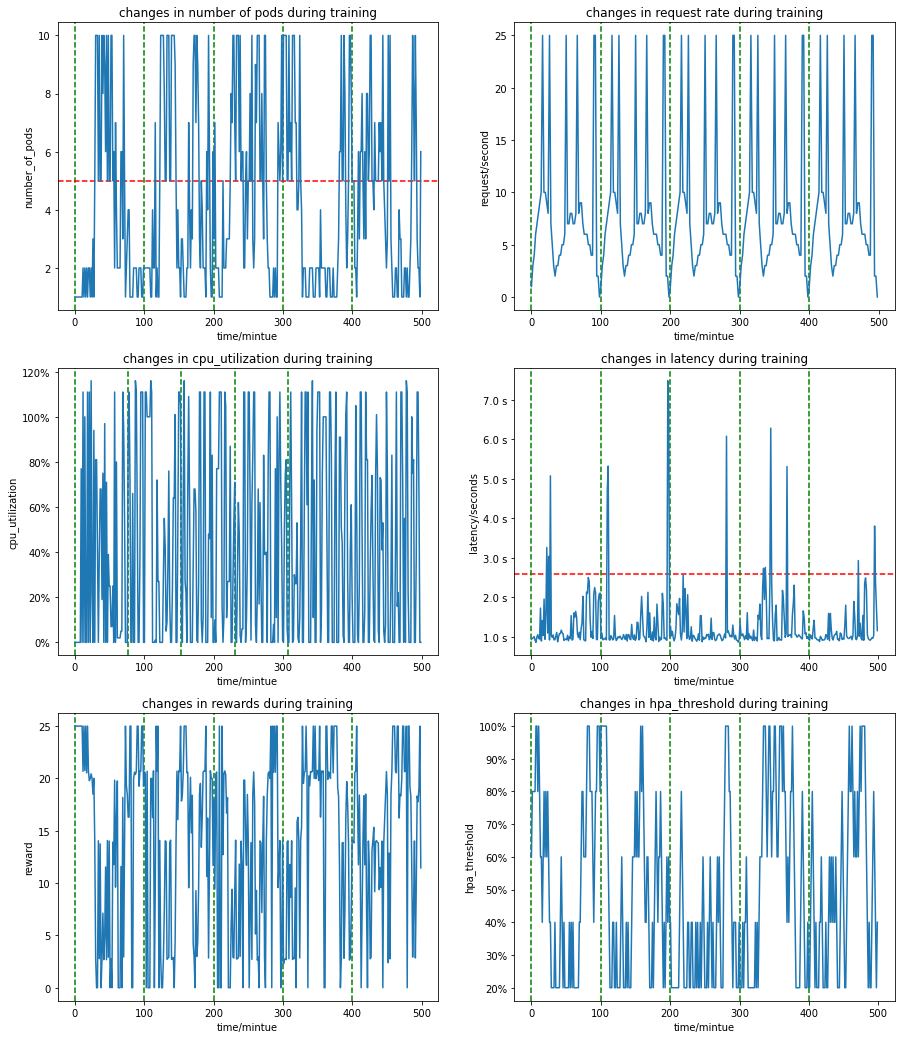

In [32]:
workload = [1, 3, 4, 6, 7, 8, 9, 10, 25, 10, 10, 9, 8, 25, 7, 5, 3, 2, 3, 3, 4, 4, 5, 5, 6, 25, 7, 7, 8, 8, 7, 7, 8, 25, 8, 9, 9, 7, 6, 6, 6, 5, 5, 4, 4, 25, 25, 2, 2, 0] * 5
plotResForTraining(workload, True)

## Plot the tendency under changing workloads with bursts one new round traing

In [39]:
def plotResForOneTesting(workload, needScale):
    # read historical data
    df = pd.read_csv('k8s_historical_states_discrete_with_bursts.csv')[384:]
    results = df[['timestep', 'reward', 'number_of_pods', 'latency', 'info', 'hpa_threshold','cpu_util']]
    podsTrainVis = results[['timestep', 'number_of_pods', 'info']]
    latencyTrainVis = results[['timestep', 'latency', 'info']]
    thesTrainVis = results[['timestep', 'hpa_threshold', 'info']]
    rewardTrainVis = results[['timestep', 'reward', 'info']]
    cpuTrainVis = results[['timestep', 'cpu_util', 'info']]
    
    # plot historical data 
    plt.figure(figsize=(15, 18))
    plt.subplot(3, 2, 1)
    #scale the horizontal axis of training rounds to time/minute
    #'*2' means every load/request rate lasts for 2 mintues
    scale = len(workload) / len(thesTrainVis) * 2 if needScale else 1
    dfX = [i * scale for i in range(len(podsTrainVis))]
    plt.xlabel('time/mintue')
    plt.ylabel('number_of_pods')
    plt.title('changes in number of pods during training')
    plt.axhline(y=5, color='r', linestyle='dashed')
    plt.plot(dfX, podsTrainVis['number_of_pods'])
    plt.subplot(3, 2, 6)
    plt.xlabel('time/mintue')
    plt.ylabel('hpa_threshold')
    plt.title('changes in hpa_threshold during training')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(dfX, thesTrainVis['hpa_threshold'])
    # plot workload data 
    plt.subplot(3, 2, 2)
    x = [i * 2 for i in range(len(workload))]
    plt.xlabel('time/mintue')
    plt.ylabel('request/second')
    plt.title('changes in request rate during training')
    plt.plot(x, workload)
    plt.subplot(3, 2, 5)
    plt.xlabel('time/mintue')
    plt.ylabel('reward')
    plt.title('changes in rewards during training')
    plt.plot(dfX, rewardTrainVis['reward'])
    plt.subplot(3, 2, 4)
    plt.xlabel('time/mintue')
    plt.ylabel('latency/seconds')
    plt.title('changes in latency during training')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
    plt.plot(dfX, latencyTrainVis['latency'])
    plt.subplot(3, 2, 3)
    plt.xlabel('time/mintue')
    plt.ylabel('cpu_utilization')
    plt.axhline(y=60, color='r', linestyle='dashed')
    plt.title('changes in cpu_utilization during training')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(dfX, cpuTrainVis['cpu_util'])

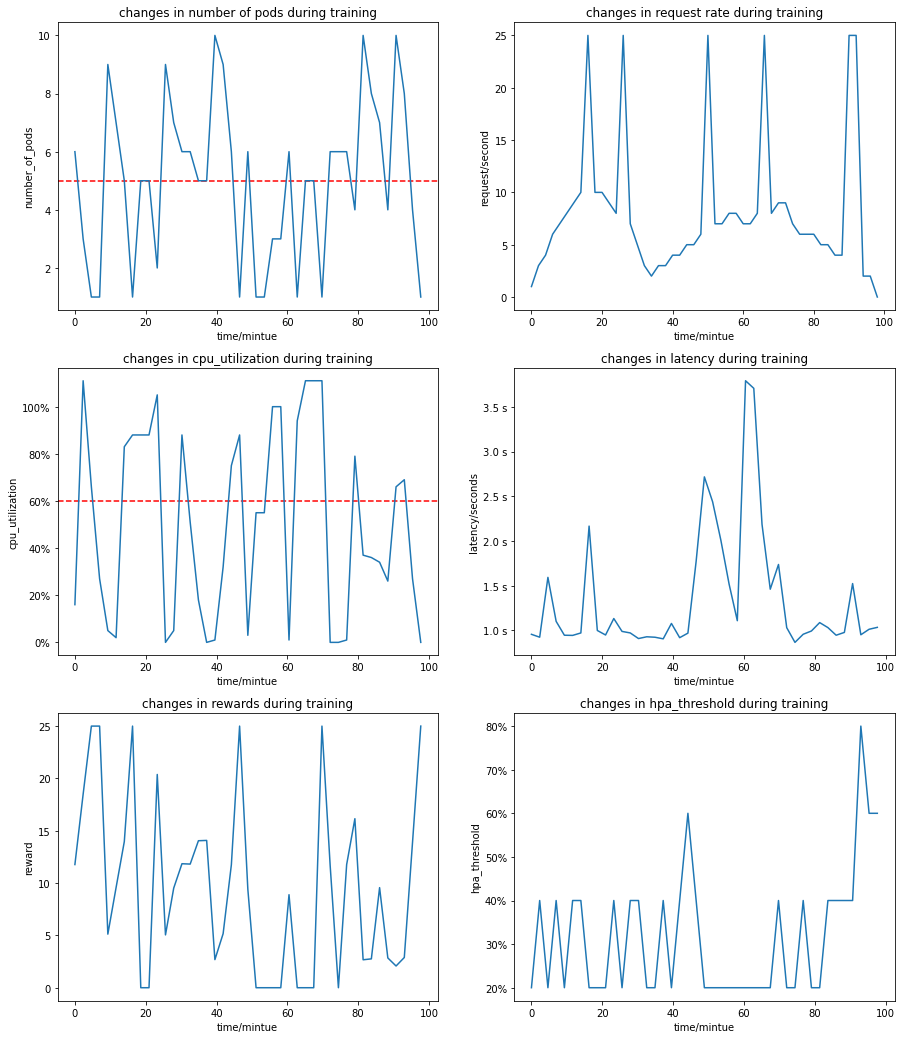

In [42]:
workload = [1, 3, 4, 6, 7, 8, 9, 10, 25, 10, 10, 9, 8, 25, 7, 5, 3, 2, 3, 3, 4, 4, 5, 5, 6, 25, 7, 7, 8, 8, 7, 7, 8, 25, 8, 9, 9, 7, 6, 6, 6, 5, 5, 4, 4, 25, 25, 2, 2, 0]
plotResForOneTesting(workload, True)

## Plot the tendency under changing workloads with bursts during new workload testing

In [43]:
def plotResForNewTesting(workload, needScale=False):
    # read historical data
    df = pd.read_csv('k8s_historical_states_discrete_testing_with_bursts.csv')
    results = df[['timestep', 'reward', 'number_of_pods', 'latency', 'info', 'hpa_threshold','cpu_util']]
    podsTrainVis = results[['timestep', 'number_of_pods', 'info']]
    latencyTrainVis = results[['timestep', 'latency', 'info']]
    thesTrainVis = results[['timestep', 'hpa_threshold', 'info']]
    rewardTrainVis = results[['timestep', 'reward', 'info']]
    cpuTrainVis = results[['timestep', 'cpu_util', 'info']]
    
    # plot historical data 
    plt.figure(figsize=(15, 18))
    plt.subplot(3, 2, 1)
    # plt.figure(dpi=120)
    scale = len(workload) / len(thesTrainVis) if needScale else 1
    plt.xlabel('time/mintue')
    plt.ylabel('number_of_pods')
    plt.title('changes in number of pods during testing')
    plt.axhline(y=5, color='r', linestyle='dashed')
    plt.plot(podsTrainVis['timestep'] * scale, podsTrainVis['number_of_pods'])
    plt.subplot(3, 2, 6)
    plt.xlabel('time/mintue')
    plt.ylabel('hpa_threshold')
    plt.title('changes in hpa_threshold during testing')
    # 添加此段代码即可
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(thesTrainVis['timestep'] * scale, thesTrainVis['hpa_threshold'])
    # plot workload data 
    plt.subplot(3, 2, 2)
    x = [i for i in range(len(workload))]
    plt.xlabel('time/mintue')
    plt.ylabel('request/second')
    plt.title('changes in request rate during testing')
    plt.plot(x, workload)
    # plt.show()
    # plt.figure(figsize=(15, 5))
    plt.subplot(3, 2, 5)
    plt.xlabel('time/mintue')
    plt.ylabel('reward')
    plt.title('changes in rewards during testing')
    plt.plot(rewardTrainVis['timestep'] * scale, rewardTrainVis['reward'])
    plt.subplot(3, 2, 4)
    plt.xlabel('time/mintue')
    plt.ylabel('latency/seconds')
    plt.title('changes in latency during testing')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
    plt.plot(latencyTrainVis['timestep'] * scale, latencyTrainVis['latency'])
    plt.subplot(3, 2, 3)
    plt.xlabel('time/mintue')
    plt.ylabel('cpu_utilization')
    plt.axhline(y=60, color='r', linestyle='dashed')
    plt.title('changes in cpu_utilization during testing')
    def to_percent(temp, position):
        return '%1.0f'%(temp) + '%'
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
    plt.plot(cpuTrainVis['timestep'] * scale, cpuTrainVis['cpu_util'])

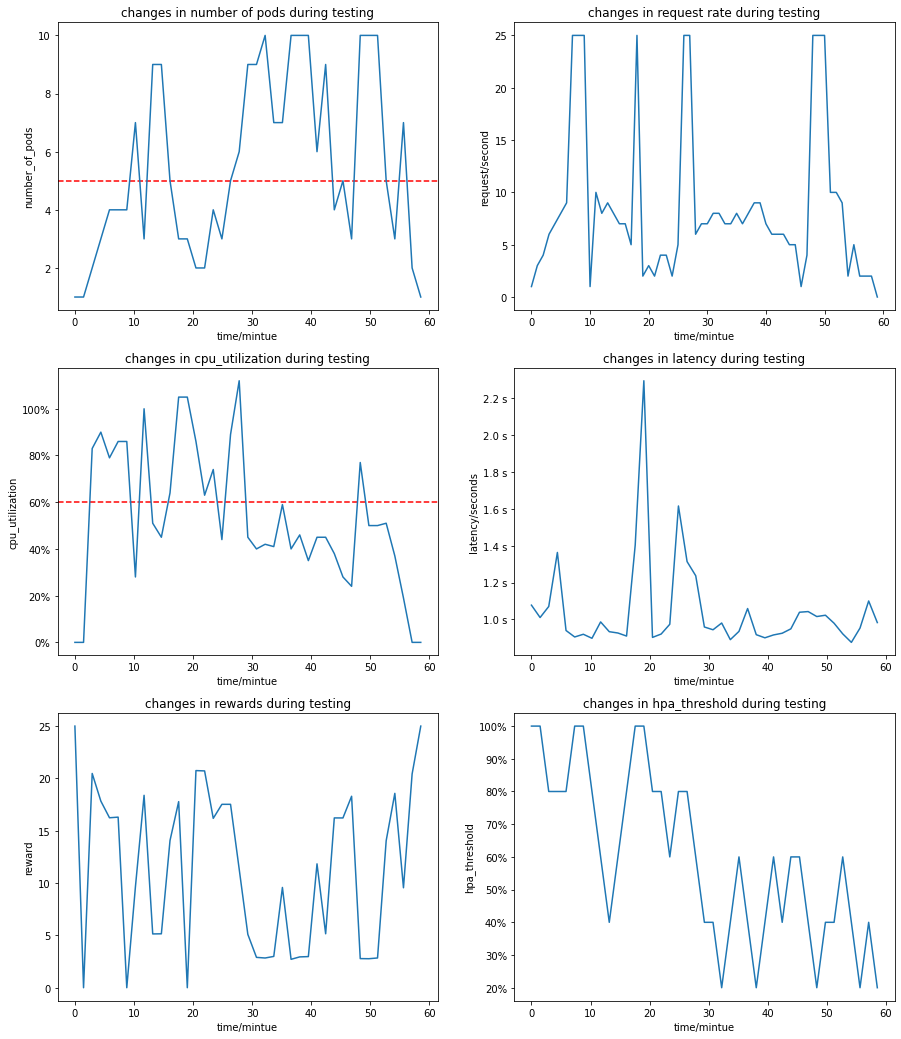

In [48]:
workload = [1, 3, 4, 6, 7, 8, 9, 25,25,25, 1, 10, 8, 9, 8, 7, 7, 5, 25, 2, 3, 2, 4, 4, 2, 5, 25,25, 6, 7, 7, 8, 8, 7, 7, 8, 7, 8, 9, 9, 7, 6, 6, 6, 5, 5, 1, 4, 25,25,25, 10, 10, 9, 2, 5, 2, 2, 2, 0]
plotResForNewTesting(workload, True)

In [50]:
df = pd.read_csv('k8s_historical_states_discrete_testing_with_bursts.csv')
print('average latency: ', df['latency'].mean(axis=0))
print('average number of pods: ', df['number_of_pods'].mean(axis=0))
print('average threshold: ', df['hpa_threshold'].mean(axis=0))

average latency:  1.0466316508536586
average number of pods:  5.536585365853658
average threshold:  59.51219512195122
